In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [112]:
dataset=pd.read_csv('air.csv',encoding='unicode_escape')
dataset.describe()
print(dataset)

       stn_code        sampling_date                        state   location  \
0           150   February - M021990               Andhra Pradesh  Hyderabad   
1           151   February - M021990               Andhra Pradesh  Hyderabad   
2           152   February - M021990               Andhra Pradesh  Hyderabad   
3           150      March - M031990               Andhra Pradesh  Hyderabad   
4           151      March - M031990               Andhra Pradesh  Hyderabad   
5           152      March - M031990               Andhra Pradesh  Hyderabad   
6           150      April - M041990               Andhra Pradesh  Hyderabad   
7           151      April - M041990               Andhra Pradesh  Hyderabad   
8           152      April - M041990               Andhra Pradesh  Hyderabad   
9           151        May - M051990               Andhra Pradesh  Hyderabad   
10          152        May - M051990               Andhra Pradesh  Hyderabad   
11          150       June - M061990    

In [113]:
print(dataset.info())

#Now, we can immediatly see that there are quite a few nulls in various columns, 
#which need work and first need a closer inspection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB
None


In [114]:
dataset.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


In [115]:
dataset.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
state       435742 non-null object
location    435739 non-null object
type        430349 non-null object
so2         401096 non-null float64
no2         419509 non-null float64
rspm        395520 non-null float64
spm         198355 non-null float64
pm2_5       9314 non-null float64
date        435735 non-null object
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990


In [119]:
option=['Delhi','Pune','Ahmedabad','Kolkata','Chennai','Hyderabad','Mumbai']
dataset=dataset.loc[dataset['location'].isin(option)]
print(dataset)

                 state   location                                type   so2  \
0       Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   4.8   
1       Andhra Pradesh  Hyderabad                     Industrial Area   3.1   
2       Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   6.2   
3       Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   6.3   
4       Andhra Pradesh  Hyderabad                     Industrial Area   4.7   
5       Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   6.4   
6       Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   5.4   
7       Andhra Pradesh  Hyderabad                     Industrial Area   4.7   
8       Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   4.2   
9       Andhra Pradesh  Hyderabad                     Industrial Area   4.0   
10      Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   3.6   
11      Andhra Pradesh  Hyderabad  Residential, Rura

In [120]:
#Finding missing values in the data set 
total = dataset.isnull().sum()[dataset.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(dataset)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
pm2_5,45013,96.82
spm,21094,45.37
rspm,4177,8.98
so2,1952,4.20
no2,1333,2.87
type,440,0.95


In [121]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    #return df_out

remove_outlier(dataset,'so2')
remove_outlier(dataset,'no2')
remove_outlier(dataset,'rspm')
remove_outlier(dataset,'spm')


In [122]:
dataset.groupby('location')[['spm','pm2_5','rspm','so2','no2']].mean()


,spm,pm2_5,rspm,so2,no2
location,,,,,
Ahmedabad,217.545965,29.115506,94.315070,14.184336,22.350704
Chennai,142.148570,23.060403,62.791883,11.695633,19.264114
Delhi,399.402088,95.113208,196.639771,8.737273,53.489147
Hyderabad,218.223793,NaN,87.342957,5.494183,25.720543
Kolkata,219.555862,58.246951,116.813195,10.305789,60.294630
Mumbai,206.349400,NaN,113.646977,6.040515,29.293274
Pune,212.736441,NaN,107.547480,24.676892,45.356015


In [123]:
dataset.groupby('location')[['spm','pm2_5','rspm','so2','no2']].mean()
#dataset.drop(['ANKLESHWAR', 'Agra','Aizawl','Akola','Alappuzha','Allahabad','Alwar','Amlai','Amona','Amritsar'])

,spm,pm2_5,rspm,so2,no2
location,,,,,
Ahmedabad,217.545965,29.115506,94.315070,14.184336,22.350704
Chennai,142.148570,23.060403,62.791883,11.695633,19.264114
Delhi,399.402088,95.113208,196.639771,8.737273,53.489147
Hyderabad,218.223793,NaN,87.342957,5.494183,25.720543
Kolkata,219.555862,58.246951,116.813195,10.305789,60.294630
Mumbai,206.349400,NaN,113.646977,6.040515,29.293274
Pune,212.736441,NaN,107.547480,24.676892,45.356015


In [124]:
by_State=dataset.groupby('state')

def impute_mean(series):
    return series.fillna(series.mean())

dataset['rspm']=by_State['rspm'].transform(impute_mean)
dataset['so2']=by_State['so2'].transform(impute_mean)
dataset['no2']=by_State['no2'].transform(impute_mean)
dataset['spm']=by_State['spm'].transform(impute_mean)
dataset['pm2_5']=by_State['pm2_5'].transform(impute_mean)





#imputer = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
#imputer = imputer.fit(dataset.groupby('state').iloc[:, 3:8].values)
#dataset.iloc[:,3:8] = imputer.transform(dataset.iloc[:, 3:8].values)
#dataset.info()

In [125]:
#Missing values being filled in columns
for col in dataset.columns.values:
    if dataset[col].isnull().sum() == 0:
        continue
    if col == 'date':
        guess_values = dataset.groupby('location')['date'].apply(lambda x: x.mode().max())
    elif col=='type':
        guess_values = dataset.groupby('location')['type'].apply(lambda x: x.mode().max())
    else:
        guess_values = dataset.groupby('location')['location'].apply(lambda x: x.mode().max())
dataset.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,84.964622,218.223793,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,84.964622,218.223793,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,84.964622,218.223793,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,84.964622,218.223793,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,84.964622,218.223793,NaN,3/1/1990


In [126]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
dataset['si']=dataset['so2'].apply(calculate_si)
df= dataset[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [127]:
#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
dataset['ni']=dataset['no2'].apply(calculate_ni)
df= dataset[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [128]:
#Function to calculate rspm individual pollutant index(rpi)
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
dataset['rpi']=dataset['rspm'].apply(calculate_si)
df= dataset[['rspm','rpi']]
df.head()
#df.tail()

,rspm,rpi
0,84.964622,101.654874
1,84.964622,101.654874
2,84.964622,101.654874
3,84.964622,101.654874
4,84.964622,101.654874


In [129]:
#Function to calculate spm individual pollutant index(spi)
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
dataset['spi']=dataset['spm'].apply(calculate_spi)
df= dataset[['spm','spi']]
df.head()

,spm,spi
0,218.223793,178.815862
1,218.223793,178.815862
2,218.223793,178.815862
3,218.223793,178.815862
4,218.223793,178.815862


In [130]:
#Function to calculate pm2_5 individual pollutant index(pmi)
def calculate_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi
dataset['pmi']=dataset['pm2_5'].apply(calculate_pmi)
df= dataset[['pm2_5','pmi']]
df.head()

,pm2_5,pmi
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [131]:
from IPython.display import Image
Image(url= "http://airquality.deq.idaho.gov/Information_AQI_files/image002.jpg")

In [132]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
dataset['AQI']=dataset.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= dataset[['location','si','ni','rpi','spi','AQI']]
df.head()


,location,si,ni,rpi,spi,AQI
0,Hyderabad,6.000,21.750,101.654874,178.815862,178.815862
1,Hyderabad,3.875,8.750,101.654874,178.815862,178.815862
2,Hyderabad,7.750,35.625,101.654874,178.815862,178.815862
3,Hyderabad,7.875,18.375,101.654874,178.815862,178.815862
4,Hyderabad,5.875,9.375,101.654874,178.815862,178.815862


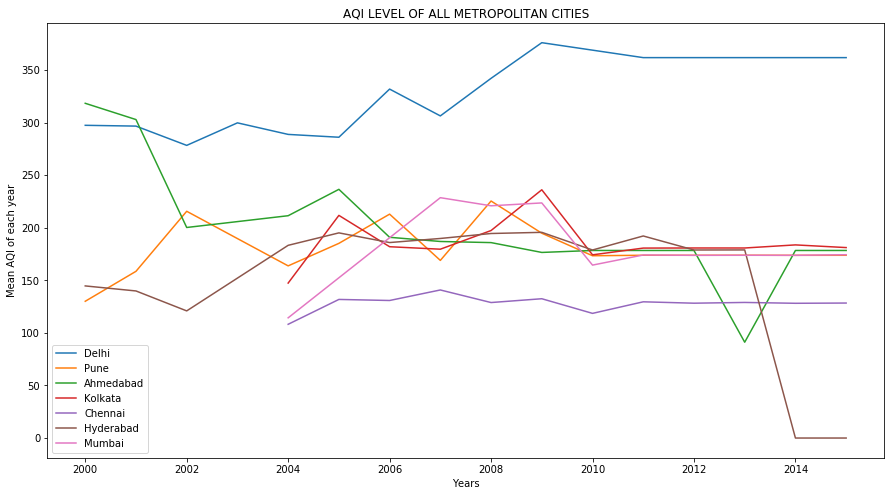

In [133]:
plt.figure(figsize=(15,8))
dataset['date'] = pd.to_datetime(dataset['date'])
list1=['Delhi','Pune','Ahmedabad','Kolkata','Chennai','Hyderabad','Mumbai']
for i in list1:
    af=dataset[dataset['location']==i].loc[(dataset['date'].dt.year>=2000)].groupby(dataset.date.dt.year)['AQI'].agg('mean')
    plt.plot(af,label=i)
    plt.legend()
    
plt.xlabel('Years')
plt.ylabel('Mean AQI of each year')
plt.title('AQI LEVEL OF ALL METROPOLITAN CITIES')
plt.show()

No handles with labels found to put in legend.


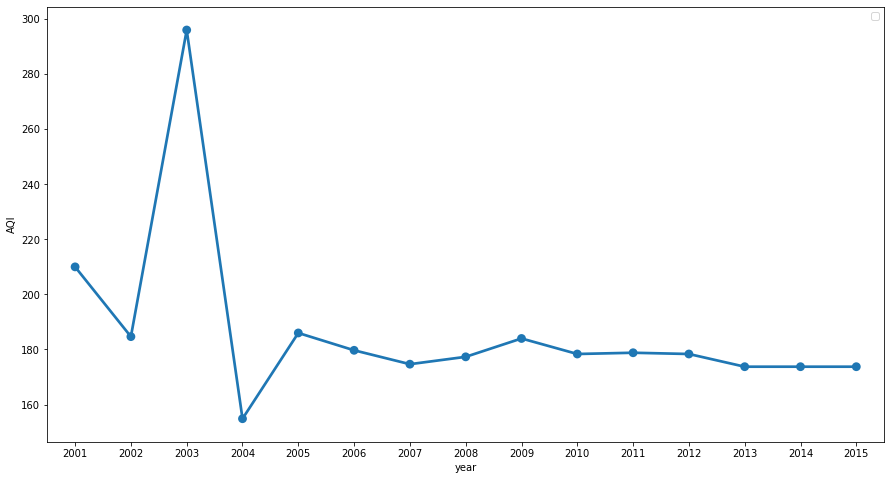

In [134]:
#Visualization of AQI across india 

dataset['date'] = pd.to_datetime(dataset['date']) # date parse
dataset['year'] = dataset['date'].dt.year # year
dataset['year'] = dataset['year'].fillna(0.0).astype(int)
dataset = dataset[(dataset['year']>2000)]

df = dataset[['AQI','year','location']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,8))
ax.legend()
sns.pointplot(x='year', y='AQI', data=df)


In [135]:
#Exploring air pollution state-wise
dataset.fillna(0.0,inplace=True)
states=dataset.groupby(['state','location'],as_index=False).mean()
state=states.groupby(['location'],as_index=False).mean()
state

,location,so2,no2,rspm,spm,pm2_5,si,ni,rpi,spi,pmi,AQI,year
0,Ahmedabad,13.339589,22.052736,94.315070,211.187865,29.115506,16.674486,27.565920,100.395915,176.693948,29.115506,181.495576,2009.166787
1,Chennai,11.695633,19.264114,62.791883,142.148570,23.060403,14.495764,24.070588,70.924826,127.732885,23.058346,128.052920,2010.748270
2,Delhi,7.311003,56.141904,196.639771,401.062090,95.113208,9.138754,69.137410,136.104093,334.585338,94.855520,334.747289,2008.605791
3,Hyderabad,4.898000,25.144318,90.525949,110.828771,0.000000,6.121349,31.418808,93.737157,93.781567,0.000000,93.887711,2011.414519
4,Kolkata,10.305789,60.294630,116.813195,219.555862,58.246951,12.301262,73.734521,97.449316,184.040982,58.191001,185.658268,2010.051209
5,Mumbai,8.662188,30.770245,113.114556,208.598908,0.000000,10.827735,38.333824,103.895154,176.148842,0.000000,181.378213,2009.987403
6,Pune,24.484664,45.489712,107.576870,212.019739,0.000000,30.545940,56.607969,97.242199,177.818595,0.000000,180.428293,2010.402214


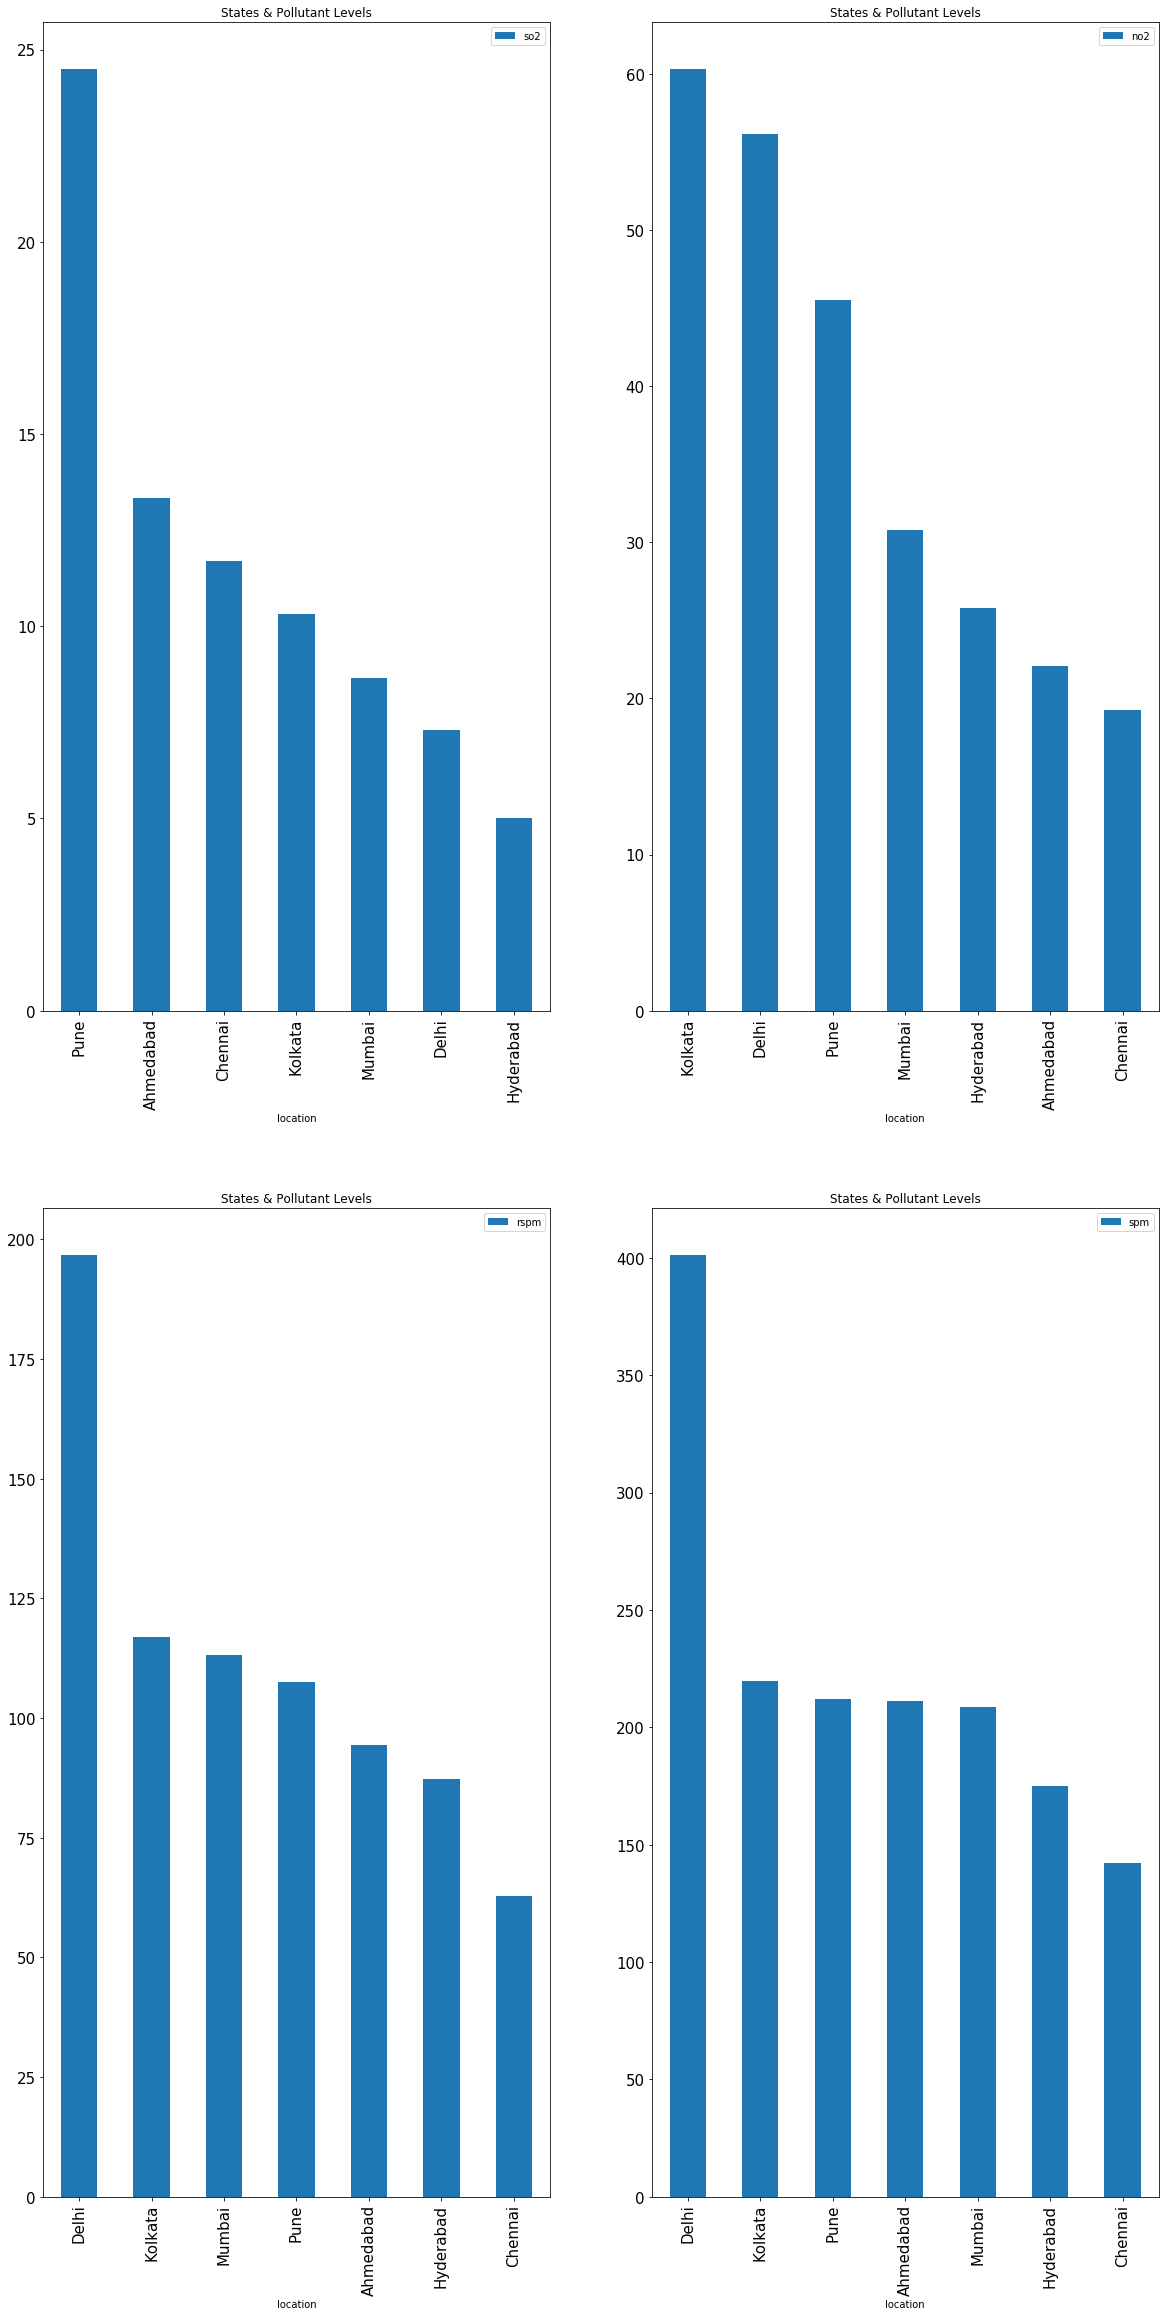

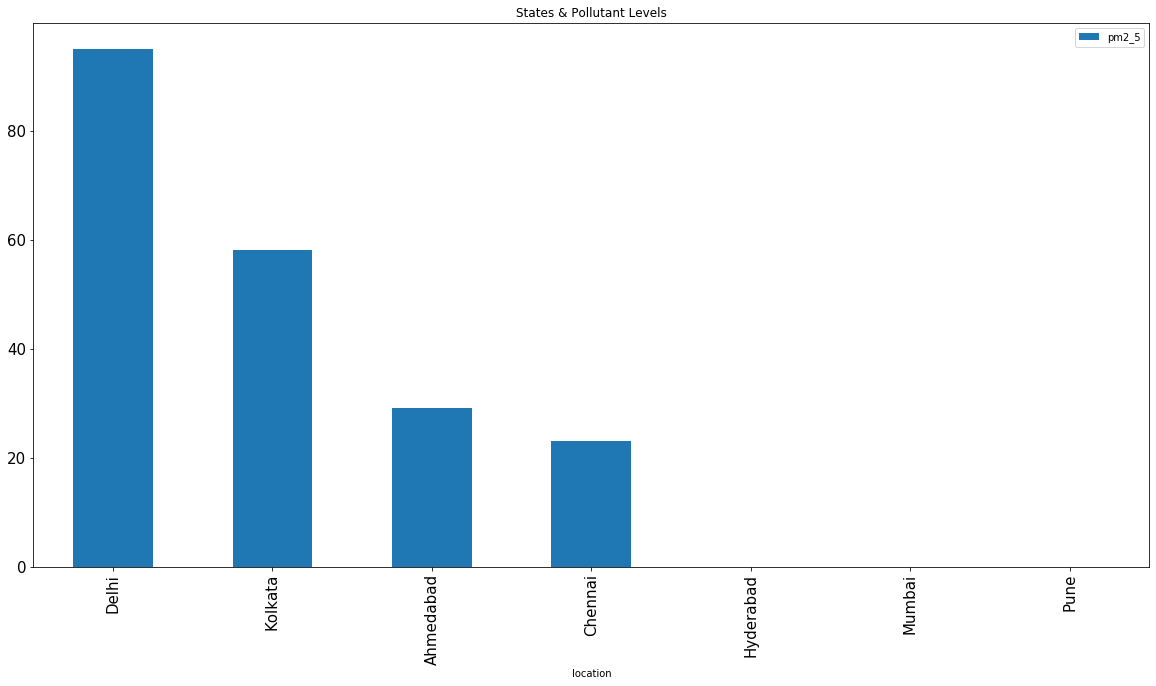

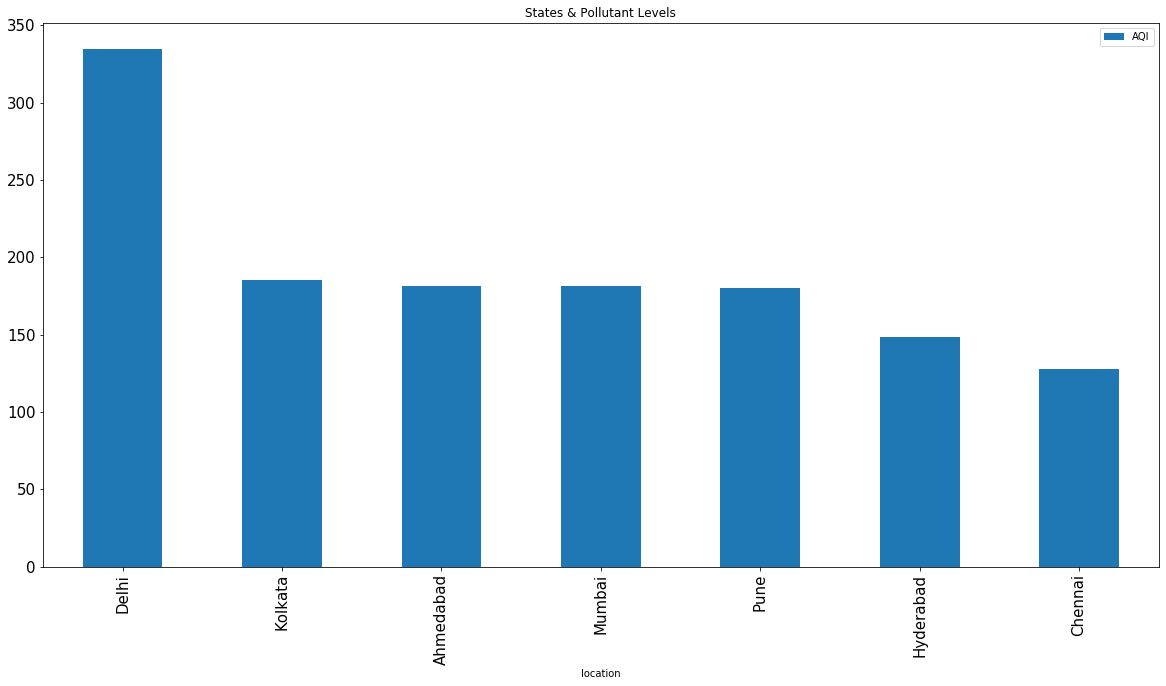

In [136]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40,40))
state_pollution = dataset[['location','so2']].groupby('location').mean()
state_pollution.reset_index(inplace = True)
state_pollution.sort_values('so2', ascending= False, inplace = True)
state_pollution.plot(kind = 'bar', figsize= (20,10), x = 'location', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[0][0])

state_pollution_no2 = dataset[['location','no2']].groupby('location').mean()
state_pollution_no2.reset_index(inplace = True)
state_pollution_no2.sort_values('no2', ascending= False, inplace = True)
state_pollution_no2.plot(kind = 'bar', figsize= (20,10), x = 'location', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[0][1])

state_pollution_rspm = dataset[['location','rspm']].groupby('location').mean()
state_pollution_rspm.reset_index(inplace = True)
state_pollution_rspm.sort_values('rspm', ascending= False, inplace = True)
state_pollution_rspm.plot(kind = 'bar', figsize= (20,40), x = 'location', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[1][0])


state_pollution_spm = dataset[['location','spm']].groupby('location').mean()
state_pollution_spm.reset_index(inplace = True)
state_pollution_spm.sort_values('spm', ascending= False, inplace = True)
state_pollution_spm.plot(kind = 'bar', figsize= (20,40), x = 'location', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[1][1])


state_pollution = dataset[['location','pm2_5']].groupby('location').mean()
state_pollution.reset_index(inplace = True)
state_pollution.sort_values('pm2_5', ascending= False, inplace = True)
state_pollution.plot(kind = 'bar', figsize= (20,10), x = 'location', fontsize= 15, title = 'States & Pollutant Levels')

state_pollution = dataset[['location','AQI']].groupby('location').mean()
state_pollution.reset_index(inplace = True)
state_pollution.sort_values('AQI', ascending= False, inplace = True)
state_pollution.plot(kind = 'bar', figsize= (20,10), x = 'location', fontsize= 15, title = 'States & Pollutant Levels')
